# Configuração de ambiente

Importação das bibliotecas:
- Numpy: para manipulação de arrays
- Pandas: para manipulação de dataframes
- Matplotlib: para visualização de dados
- Seaborn: para visualização de dados

E dentre outras para o aprendizado não supervisionado.

In [193]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Leitura e visualização do dataset

Leitura do arquivo "dataset.csv" através da função "read_csv" do Pandas e armazenamento do resultado na variável "df". Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [194]:
csv_url = "https://github.com/viniciusgugelmin/data-science-2/blob/master/projects/cursos-prouni/data/dataset_clean.csv?raw=true"

df = pd.read_csv(csv_url, sep=';', encoding='utf-8', low_memory=False)

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém.

In [195]:
df.head()

grau     turno  mensalidade  bolsa_integral_cotas  \
0  Bacharelado  Integral      9999.99                  15.0   
1  Bacharelado   Noturno      9836.40                   1.0   
2  Bacharelado  Integral      9715.61                   2.0   
3  Bacharelado   Noturno      9689.34                   3.0   
4  Bacharelado  Integral      9674.34                   4.0   

   bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  \
0                  14.0                  0.0                  0.0   
1                   0.0                  0.0                  0.0   
2                   5.0                  6.0                 10.0   
3                   2.0                  0.0                  0.0   
4                   1.0                  5.0                  2.0   

          curso_id curso_busca  cidade_busca uf_busca     cidade_filtro  \
0     706710394154    Medicina  Campo Grande       MS  NTAwMjAwNDAyNzA0   
1  104191210567043  Enfermagem       Crateus       CE  MjMwNDAxODA0MTAz   
2    1002328574024    Medicina     Sao Paulo       SP  MzUxNTA2MTUwMzA4   
3  104191212798093  Psicologia       Crateus       CE  MjMwNDAxODA0MTAz   
4   65899611932754    Medicina    Rio Branco       AC  MTIwMjAwNDAwNDAx   

                           universidade_nome  \
0          Universidade Anhanguera - UNIDERP   
1          Faculdade Princesa do Oeste - FPO   
2  Universidade Cidade de São Paulo - UNICID   
3          Faculdade Princesa do Oeste - FPO   
4        Faculdade Barão do Rio Branco - FAB   

                                         campus_nome  campus_id        nome  \
0                 CAMPO GRANDE - SEDE - Miguel Couto     706710    Medicina   
1                         UNIDADE SEDE - São Vicente    1041912  Enfermagem   
2  UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...    1002328    Medicina   
3                         UNIDADE SEDE - São Vicente    1041912  Psicologia   
4  CAMPUS  - RIO BRANCO - JARDIM EUROPA II - Jard...     658996    Medicina   

   nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  \
0               740.22               726.46                0.00   
1               663.36                 0.00                0.00   
2               739.62               738.08              738.96   
3               651.00               652.22                0.00   
4               758.32               723.94              734.92   

   nota_parcial_cotas  
0                0.00  
1                0.00  
2              718.64  
3                0.00  
4              711.26

Realizamos algumas visualizações de gráficos para entender qual a proporção e com o que estamos trabalhando.

In [196]:
hist =  px.histogram (df,  x = "turno", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição de turnos') 
hist.show()

In [197]:
df_uf_sort = df.copy()
df_uf_sort = df_uf_sort.sort_values(by=['uf_busca'], ascending=True)

hist =  px.histogram (df_uf_sort,  x = "uf_busca", nbins=60) 
hist.update_layout(width=1000,height=400,title_text='Distribuição de estados') 
hist.show()

Verificamos o total de linhas e colunas

In [198]:
df.shape

(41447, 20)

# Limpeza e troca de valores

Iniciamos a limpeza de colunas desnecessárias para o aprendizado e trocamos valores de texto usando o LabelEncoder para opções numéricas.

In [199]:
le = LabelEncoder()
df_new = df.copy()

df_new["grau"] = le.fit_transform(df_new.grau.values)
df_new["turno"] = le.fit_transform(df_new.turno.values)
df_new["curso_busca"] = le.fit_transform(df_new.curso_busca.values)
df_new["cidade_busca"] = le.fit_transform(df_new.cidade_busca.values)
df_new["uf_busca"] = le.fit_transform(df_new.uf_busca.values)
df_new["universidade_nome"] = le.fit_transform(df_new.universidade_nome.values)
df_new["campus_nome"] = le.fit_transform(df_new.campus_nome.values)
df_new["nome"] = le.fit_transform(df_new.nome.values)

df_new = df_new.drop(['cidade_filtro'], axis=1)
df_new = df_new.drop(['curso_id'], axis=1)
df_new = df_new.drop(['cidade_busca'], axis=1)
df_new = df_new.drop(['universidade_nome'], axis=1)
df_new = df_new.drop(['campus_nome'], axis=1)
df_new = df_new.drop(['campus_id'], axis=1)

df_new

grau  turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  \
0         0      1      9999.99                  15.0                  14.0   
1         0      3      9836.40                   1.0                   0.0   
2         0      1      9715.61                   2.0                   5.0   
3         0      3      9689.34                   3.0                   2.0   
4         0      1      9674.34                   4.0                   1.0   
...     ...    ...          ...                   ...                   ...   
41442     1      0       149.00                   1.0                   0.0   
41443     2      0       144.00                   1.0                   2.0   
41444     2      4       139.00                   1.0                   0.0   
41445     0      0       139.00                   1.0                   0.0   
41446     2      0       139.00                   3.0                   1.0   

       bolsa_parcial_cotas  bolsa_parcial_ampla  curso_busca  uf_busca  nome  \
0                      0.0                  0.0          210        11   210   
1                      0.0                  0.0           79         5    79   
2                      6.0                 10.0          210        25   210   
3                      0.0                  0.0          248         5   248   
4                      5.0                  2.0          210         0   210   
...                    ...                  ...          ...       ...   ...   
41442                  0.0                  0.0          281        26   281   
41443                  2.0                  5.0          205        25   205   
41444                  0.0                  0.0          169         6   169   
41445                  0.0                  0.0          270         7   270   
41446                  0.0                  0.0          149        13   149   

       nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  \
0                   740.22               726.46                0.00   
1                   663.36                 0.00                0.00   
2                   739.62               738.08              738.96   
3                   651.00               652.22                0.00   
4                   758.32               723.94              734.92   
...                    ...                  ...                 ...   
41442               502.36                 0.00                0.00   
41443               533.34               450.00              450.00   
41444               580.76                 0.00                0.00   
41445               548.26                 0.00                0.00   
41446               605.32               573.70                0.00   

       nota_parcial_cotas  
0                    0.00  
1                    0.00  
2                  718.64  
3                    0.00  
4                  711.26  
...                   ...  
41442                0.00  
41443              450.00  
41444                0.00  
41445                0.00  
41446                0.00  

[41447 rows x 14 columns]

# Peparação para aplicação dos algoritmos

Pegamos uma amostra do dataset

In [200]:
df_ul = df_new.copy()
df_ul = df_ul.sample(frac = 0.1)

df_ul

grau  turno  mensalidade  bolsa_integral_cotas  bolsa_integral_ampla  \
39453     1      0       230.00                   0.0                   0.0   
21767     2      0       360.00                   1.0                   0.0   
13058     0      3       685.41                   1.0                   0.0   
25380     2      0       309.00                   1.0                   0.0   
21028     2      0       388.57                   1.0                   0.0   
...     ...    ...          ...                   ...                   ...   
39427     1      0       230.00                   0.0                   0.0   
9866      2      2       849.62                   0.0                   1.0   
13708     0      0       659.00                   0.0                   1.0   
13832     0      2       655.03                   1.0                   1.0   
41314     1      0       149.00                   0.0                   1.0   

       bolsa_parcial_cotas  bolsa_parcial_ampla  curso_busca  uf_busca  nome  \
39453                  0.0                  1.0          177        25   177   
21767                  0.0                  0.0            9         9     9   
13058                  0.0                  0.0          270         4   270   
25380                  0.0                  0.0            9         2     9   
21028                  0.0                  0.0          155        18   155   
...                    ...                  ...          ...       ...   ...   
39427                  0.0                  1.0          281        23   281   
9866                   0.0                  0.0           77        25    77   
13708                  0.0                  0.0           95        25    95   
13832                  1.0                  1.0            0        17     0   
41314                  0.0                  0.0          281        22   281   

       nota_integral_ampla  nota_integral_cotas  nota_parcial_ampla  \
39453                 0.00                  0.0              618.30   
21767               635.64                  0.0                0.00   
13058               616.48                  0.0                0.00   
25380               450.00                  0.0                0.00   
21028               610.60                  0.0                0.00   
...                    ...                  ...                 ...   
39427                 0.00                  0.0              450.00   
9866                601.04                  0.0                0.00   
13708               579.56                  0.0                0.00   
13832               558.90                450.0              556.22   
41314               502.26                  0.0                0.00   

       nota_parcial_cotas  
39453                 0.0  
21767                 0.0  
13058                 0.0  
25380                 0.0  
21028                 0.0  
...                   ...  
39427                 0.0  
9866                  0.0  
13708                 0.0  
13832               450.0  
41314                 0.0  

[4145 rows x 14 columns]

# Escalonamento

In [201]:
scale = StandardScaler()
df_scale = scale.fit_transform(df_ul)
df_scale

array([[ 0.14397335, -0.85865647, -0.69592655, ..., -0.817433  ,
         1.58268078, -0.3928871 ],
       [ 1.28284655, -0.85865647, -0.46086795, ..., -0.817433  ,
        -0.79405085, -0.3928871 ],
       [-0.99489984,  1.30188445,  0.12751989, ..., -0.817433  ,
        -0.79405085, -0.3928871 ],
       ...,
       [-0.99489984, -0.85865647,  0.07976683, ..., -0.817433  ,
        -0.79405085, -0.3928871 ],
       [-0.99489984,  0.58170414,  0.0725885 , ...,  0.78900085,
         1.34404662,  2.15777661],
       [ 0.14397335, -0.85865647, -0.84238614, ..., -0.817433  ,
        -0.79405085, -0.3928871 ]])

# Dendograma

Vamos ver uma representação gráfica em forma de árvore (Dendograma) sobre a estrutura dos agrupamentos.

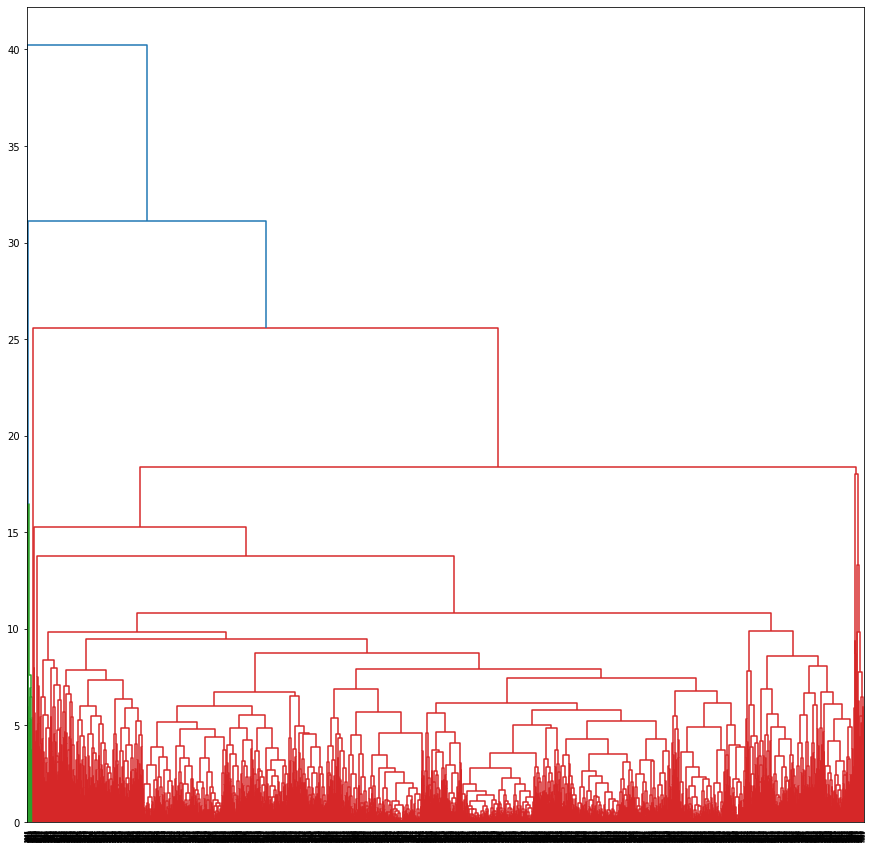

In [202]:
plt.figure(figsize=(15, 15))
df_dendrogram = dendrogram(linkage(df_scale, method = "complete"))

# PCA

In [203]:
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(df_new)
pca_transform.shape

(41447, 2)

Razão das variáveis explicativas

In [204]:
pca.explained_variance_ratio_

array([0.61326176, 0.19996546])

Soma das variáveis explicativas

In [205]:
pca.explained_variance_ratio_.sum()

0.813227212778163

In [206]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(pca_transform, labels=labels,
    dimensions=range(2),
    color=df_new["nome"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Elbow Method

In [207]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(pca_transform)

    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



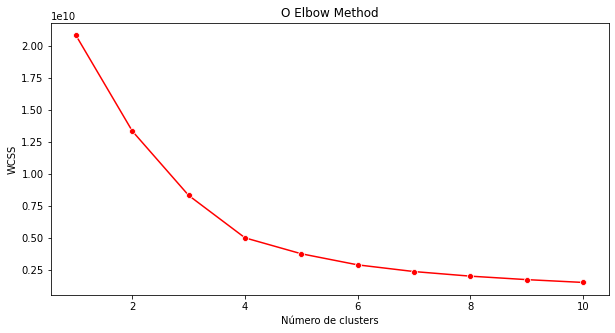

In [208]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('O Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

# Agrupamento (K MEANS)

In [209]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(pca_transform)
centroides = kmeans1.cluster_centers_
centroides

array([[-189.24933502, -228.54980299],
       [6055.1065228 ,  588.36836856],
       [ 685.14100132,  -13.63769008],
       [-305.96319096,  459.69343595]])

In [210]:
classificacao = kmeans1.labels_
classificacao

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [211]:
graf1 = px.scatter(x = pca_transform[:,0], y = pca_transform[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.show()

In [212]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

Grupo
0          1
1          1
2          1
3          1
4          1
...      ...
41442      0
41443      0
41444      0
41445      0
41446      0

[41447 rows x 1 columns]

In [213]:
df_group = pd.concat([df, agrupamento],axis=1)
df_group = df_group[df_group['Grupo'].notna()]
df_group

grau              turno  mensalidade  bolsa_integral_cotas  \
0       Bacharelado           Integral      9999.99                  15.0   
1       Bacharelado            Noturno      9836.40                   1.0   
2       Bacharelado           Integral      9715.61                   2.0   
3       Bacharelado            Noturno      9689.34                   3.0   
4       Bacharelado           Integral      9674.34                   4.0   
...             ...                ...          ...                   ...   
41442  Licenciatura  Curso a Distância       149.00                   1.0   
41443   Tecnológico  Curso a Distância       144.00                   1.0   
41444   Tecnológico         Vespertino       139.00                   1.0   
41445   Bacharelado  Curso a Distância       139.00                   1.0   
41446   Tecnológico  Curso a Distância       139.00                   3.0   

       bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  \
0                      14.0                  0.0                  0.0   
1                       0.0                  0.0                  0.0   
2                       5.0                  6.0                 10.0   
3                       2.0                  0.0                  0.0   
4                       1.0                  5.0                  2.0   
...                     ...                  ...                  ...   
41442                   0.0                  0.0                  0.0   
41443                   2.0                  2.0                  5.0   
41444                   0.0                  0.0                  0.0   
41445                   0.0                  0.0                  0.0   
41446                   1.0                  0.0                  0.0   

              curso_id                 curso_busca          cidade_busca  ...  \
0         706710394154                    Medicina          Campo Grande  ...   
1      104191210567043                  Enfermagem               Crateus  ...   
2        1002328574024                    Medicina             Sao Paulo  ...   
3      104191212798093                  Psicologia               Crateus  ...   
4       65899611932754                    Medicina            Rio Branco  ...   
...                ...                         ...                   ...  ...   
41442     994312865605                  Sociologia  Paraiso do Tocantins  ...   
41443   65868712869275                   Marketing           Sao VIcente  ...   
41444    1056445674232  Gestão de Recursos Humanos              Brasilia  ...   
41445      96781210935              Serviço Social               Vitoria  ...   
41446  200467412868575            Gestão Ambiental              Santarem  ...   

          cidade_filtro                                  universidade_nome  \
0      NTAwMjAwNDAyNzA0                  Universidade Anhanguera - UNIDERP   
1      MjMwNDAxODA0MTAz                  Faculdade Princesa do Oeste - FPO   
2      MzUxNTA2MTUwMzA4          Universidade Cidade de São Paulo - UNICID   
3      MjMwNDAxODA0MTAz                  Faculdade Princesa do Oeste - FPO   
4      MTIwMjAwNDAwNDAx                Faculdade Barão do Rio Branco - FAB   
...                 ...                                                ...   
41442  MTcwMTAwNDE2MTA5                       Universidade Paulista - UNIP   
41443  MzUxNTA2MzUxMDA5                     Faculdade de São VIcente - FSV   
41444  NTMwMTAwMTAwMTA4  Centro Universitário Planalto do Distrito Fede...   
41445  MzIwMzAwOTA1MzA5                       Universidade Paulista - UNIP   
41446  MTUwMTAwMjA2ODA3                       Universidade Paulista - UNIP   

                                             campus_nome campus_id  \
0                     CAMPO GRANDE - SEDE - Miguel Couto    706710   
1                             UNIDADE SEDE - São Vicente   1041912   
2      UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...   1002328   
3                      

In [214]:
df_group.iloc[150 , :]

grau                                                 Bacharelado
turno                                                   Integral
mensalidade                                              4361.49
bolsa_integral_cotas                                         0.0
bolsa_integral_ampla                                         8.0
bolsa_parcial_cotas                                          0.0
bolsa_parcial_ampla                                          0.0
curso_id                                             65772539324
curso_busca                                          Odontologia
cidade_busca                                              Itajai
uf_busca                                                      SC
cidade_filtro                                   NDIwNDAxMzA4MjAz
universidade_nome       Universidade do Vale do Itajaí - UNIVALI
campus_nome                               CAMPUS ITAJAÍ - Centro
campus_id                                                 657725
nome                     

In [215]:
grup0 = df_group.loc[df_group.Grupo == 0]
grup0 

grau              turno  mensalidade  bolsa_integral_cotas  \
9370    Bacharelado            Noturno       880.00                   1.0   
9419    Bacharelado           Matutino       878.00                   1.0   
9433   Licenciatura           Integral       877.79                   0.0   
9434   Licenciatura            Noturno       877.79                   0.0   
9435   Licenciatura            Noturno       877.79                   0.0   
...             ...                ...          ...                   ...   
41442  Licenciatura  Curso a Distância       149.00                   1.0   
41443   Tecnológico  Curso a Distância       144.00                   1.0   
41444   Tecnológico         Vespertino       139.00                   1.0   
41445   Bacharelado  Curso a Distância       139.00                   1.0   
41446   Tecnológico  Curso a Distância       139.00                   3.0   

       bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  \
9370                    0.0                  0.0                  0.0   
9419                    0.0                  0.0                  0.0   
9433                    4.0                  0.0                  0.0   
9434                    6.0                  0.0                  0.0   
9435                    4.0                  0.0                  0.0   
...                     ...                  ...                  ...   
41442                   0.0                  0.0                  0.0   
41443                   2.0                  2.0                  5.0   
41444                   0.0                  0.0                  0.0   
41445                   0.0                  0.0                  0.0   
41446                   1.0                  0.0                  0.0   

              curso_id                 curso_busca          cidade_busca  ...  \
9370     1004951198813      Sistemas de Informação            Vila Velha  ...   
9419    65936313034351                  Psicologia    Primavera do Leste  ...   
9433    68557611053284                      Música         Caxias do Sul  ...   
9434      100369211123                  Matemática         Caxias do Sul  ...   
9435     1003692256743  Letras - Língua Portuguesa         Caxias do Sul  ...   
...                ...                         ...                   ...  ...   
41442     994312865605                  Sociologia  Paraiso do Tocantins  ...   
41443   65868712869275                   Marketing           Sao VIcente  ...   
41444    1056445674232  Gestão de Recursos Humanos              Brasilia  ...   
41445      96781210935              Serviço Social               Vitoria  ...   
41446  200467412868575            Gestão Ambiental              Santarem  ...   

          cidade_filtro                                  universidade_nome  \
9370   MzIwMzAwOTA1MjAw                      Universidade VIla Velha - UVV   
9419   NTEwNTAxOTA3MDQw  Faculdade de Ciências Humanas e Biológicas e d...   
9433   NDMwMjAxNjA1MTA4                Universidade de Caxias do Sul - UCS   
9434   NDMwMjAxNjA1MTA4                Universidade de Caxias do Sul - UCS   
9435   NDMwMjAxNjA1MTA4                Universidade de Caxias do Sul - UCS   
...                 ...                                                ...   
41442  MTcwMTAwNDE2MTA5                       Universidade Paulista - UNIP   
41443  MzUxNTA2MzUxMDA5                     Faculdade de São VIcente - FSV   
41444  NTMwMTAwMTAwMTA4  Centro Universitário Planalto do Distrito Fede...   
41445  MzIwMzAwOTA1MzA5                       Universidade Paulista - UNIP   
41446  MTUwMTAwMjA2ODA3                       Universidade Paulista - UNIP   

                                             campus_nome campus_id  \
9370                         UNIDADE SEDE - Boa Vista II   1004951   
9419                          UNIDADE SEDE - Jardim Riva    659363   
9433             CENTRO DE ARTES E ARQUITETURA - Samuara    685576   
9434                   

In [216]:
grup0.shape

(21442, 21)

In [217]:
grup1 = df_group.loc[df_group.Grupo == 1]
grup1

grau     turno  mensalidade  bolsa_integral_cotas  \
0    Bacharelado  Integral      9999.99                  15.0   
1    Bacharelado   Noturno      9836.40                   1.0   
2    Bacharelado  Integral      9715.61                   2.0   
3    Bacharelado   Noturno      9689.34                   3.0   
4    Bacharelado  Integral      9674.34                   4.0   
..           ...       ...          ...                   ...   
167  Bacharelado  Integral      4108.00                   2.0   
168  Bacharelado   Noturno      4080.00                   0.0   
169  Bacharelado   Noturno      4080.00                   0.0   
170  Bacharelado  Integral      4069.54                   0.0   
171  Bacharelado  Integral      4023.00                   2.0   

     bolsa_integral_ampla  bolsa_parcial_cotas  bolsa_parcial_ampla  \
0                    14.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     5.0                  6.0                 10.0   
3                     2.0                  0.0                  0.0   
4                     1.0                  5.0                  2.0   
..                    ...                  ...                  ...   
167                   1.0                  0.0                  0.0   
168                   1.0                  1.0                 22.0   
169                   1.0                  0.0                 21.0   
170                   3.0                  0.0                  0.0   
171                   2.0                  0.0                  0.0   

            curso_id                                    curso_busca  \
0       706710394154                                       Medicina   
1    104191210567043                                     Enfermagem   
2      1002328574024                                       Medicina   
3    104191212798093                                     Psicologia   
4     65899611932754                                       Medicina   
..               ...                                            ...   
167     657954705234               Engenharia Ambiental e Sanitária   
168   65885813655463                                     Jornalismo   
169   65885813035553  Comunicação Social - Publicidade e Propaganda   
170   13675511225684                                    Odontologia   
171    6579541142864                          Ciência da Computação   

       cidade_busca  ...     cidade_filtro  \
0      Campo Grande  ...  NTAwMjAwNDAyNzA0   
1           Crateus  ...  MjMwNDAxODA0MTAz   
2         Sao Paulo  ...  MzUxNTA2MTUwMzA4   
3           Crateus  ...  MjMwNDAxODA0MTAz   
4        Rio Branco  ...  MTIwMjAwNDAwNDAx   
..              ...  ...               ...   
167  Rio de Janeiro  ...  MzMwNjAxODA0NTU3   
168        Curitiba  ...  NDExMDAzNzA2OTAy   
169        Curitiba  ...  NDExMDAzNzA2OTAy   
170   Caxias do Sul  ...  NDMwMjAxNjA1MTA4   
171  Rio de Janeiro  ...  MzMwNjAxODA0NTU3   

                                     universidade_nome  \
0                    Universidade Anhanguera - UNIDERP   
1                    Faculdade Princesa do Oeste - FPO   
2            Universidade Cidade de São Paulo - UNICID   
3                    Faculdade Princesa do Oeste - FPO   
4                  Faculdade Barão do Rio Branco - FAB   
..                                                 ...   
167  Pontifícia Universidade Católica do Rio de Jan...   
168  Faculdade Anchieta de Ensino Superior do Paran...   
169  Faculdade Anchieta de Ensino Superior do Paran...   
170   Centro Universitário da Serra Gaúcha - Fsg - FSG   
171  Pontifícia Universidade Católica do Rio de Jan...   

                                           campus_nome campus_id  \
0                   CAMPO GRANDE - SEDE - Miguel Couto    706710   
1                           UNIDADE SEDE - São Vicente   1041912   
2    UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...   1002328   
3  

In [218]:
grup1.shape

(172, 21)